In [56]:
import pandas as pd
import yfinance as yf

# Define the symbols for Nvidia, Intel, and AMD
symbols = ['AMD', 'INTC', 'NVDA']

# Calculate the end date as today
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Calculate the start date as 10 years before the end date
start_date = (pd.Timestamp.today() - pd.DateOffset(years=10)).strftime('%Y-%m-%d')

# Fetch historical stock data
stock_data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Create a DataFrame for the portfolio
portfolio_df = pd.DataFrame(stock_data)

# Rename columns to include stock symbols
portfolio_df.columns = symbols

# Add a column for the number of shares (1000 shares for each stock)
portfolio_df['Shares_AMD'] = 1000
portfolio_df['Shares_INTC'] = 1000
portfolio_df['Shares_NVDA'] = 1000

# Calculate the value of the portfolio in USD
portfolio_df['Portfolio_Value'] = (portfolio_df['AMD'] * portfolio_df['Shares_AMD'] +
                                       portfolio_df['INTC'] * portfolio_df['Shares_INTC'] +
                                       portfolio_df['NVDA'] * portfolio_df['Shares_NVDA'])

# Round the portfolio value columns to 2 decimal places
portfolio_df = portfolio_df.round({'AMD': 2, 'INTC': 2, 'NVDA': 2, 'Portfolio_Value': 2})

# Print the first few rows of the portfolio DataFrame
display(portfolio_df.head())
display(portfolio_df.tail())



[*********************100%%**********************]  3 of 3 completed


,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value
Date,,,,,,,
2014-03-28,3.88,19.43,4.24,1000,1000,1000,27555.42
2014-03-31,4.01,19.58,4.24,1000,1000,1000,27831.93
2014-04-01,4.07,19.72,4.42,1000,1000,1000,28203.78
2014-04-02,4.06,19.64,4.39,1000,1000,1000,28089.49
2014-04-03,4.00,20.03,4.44,1000,1000,1000,28471.33


,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value
Date,,,,,,,
2024-03-21,178.68,42.42,914.35,1000,1000,1000,1135449.97
2024-03-22,179.65,42.57,942.89,1000,1000,1000,1165110.01
2024-03-25,178.63,41.83,950.02,1000,1000,1000,1170480.03
2024-03-26,177.87,41.99,925.61,1000,1000,1000,1145469.98
2024-03-27,179.59,43.77,902.50,1000,1000,1000,1125860.00


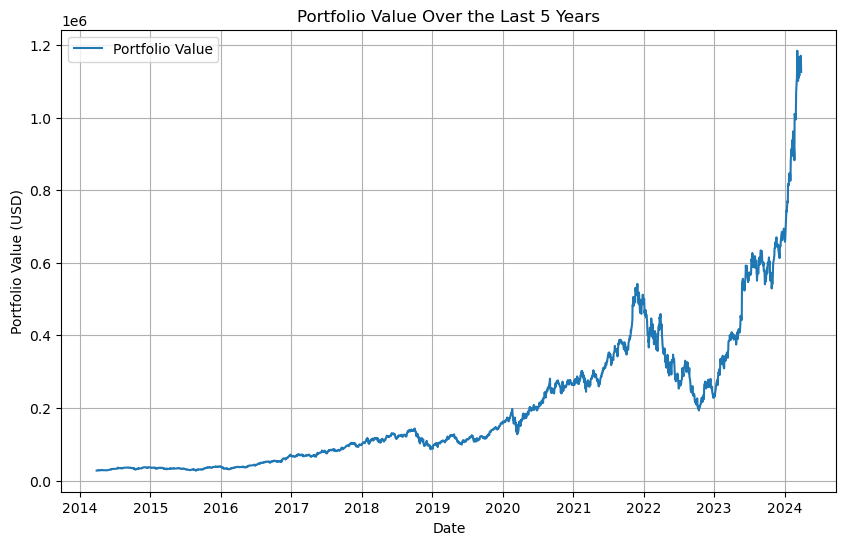

In [57]:
# Plot the portfolio value for the last 5 years
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df.index, portfolio_df['Portfolio_Value'], label='Portfolio Value')
plt.title('Portfolio Value Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.grid(True)
plt.show()

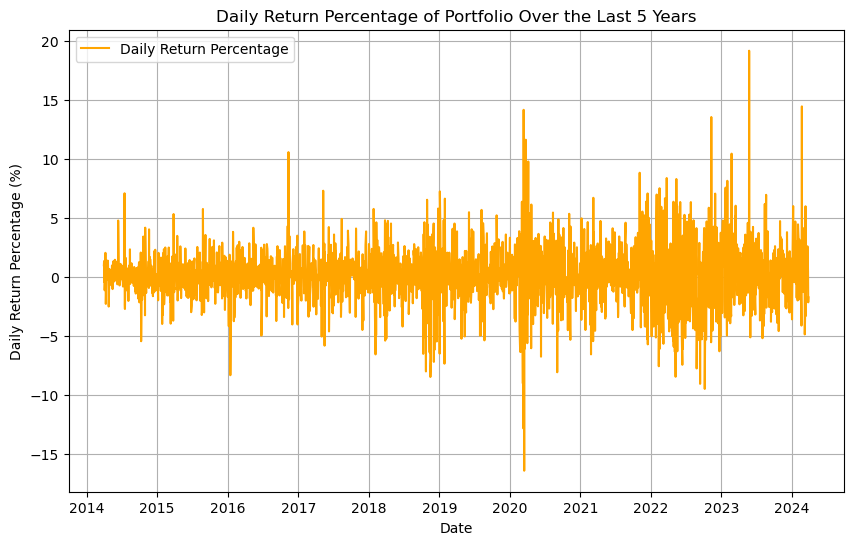

In [58]:
# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Value'].pct_change() * 100

# Plot the daily return percentage for the last 5 years
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df.index, portfolio_df['Daily_Return_Percentage'], label='Daily Return Percentage', color='orange')
plt.title('Daily Return Percentage of Portfolio Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Daily Return Percentage (%)')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
# Calculate daily percentage change in portfolio value and add it as a new column
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Value'].pct_change() * 100

# Print the first few rows of the portfolio DataFrame
portfolio_df

,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value,Daily_Return_Percentage
Date,,,,,,,,
2014-03-28,3.88,19.43,4.24,1000,1000,1000,27555.42,NaN
2014-03-31,4.01,19.58,4.24,1000,1000,1000,27831.93,1.003469
2014-04-01,4.07,19.72,4.42,1000,1000,1000,28203.78,1.336055
2014-04-02,4.06,19.64,4.39,1000,1000,1000,28089.49,-0.405229
2014-04-03,4.00,20.03,4.44,1000,1000,1000,28471.33,1.359370
...,...,...,...,...,...,...,...,...
2024-03-21,178.68,42.42,914.35,1000,1000,1000,1135449.97,0.870608
2024-03-22,179.65,42.57,942.89,1000,1000,1000,1165110.01,2.612184
2024-03-25,178.63,41.83,950.02,1000,1000,1000,1170480.03,0.460902


In [99]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

# Define the symbols for Nvidia, Intel, and AMD
symbols = ['AMD', 'INTC', 'NVDA']

# Calculate the end date as today
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Calculate the start date as 5 years before the end date
start_date = (pd.Timestamp.today() - pd.DateOffset(years=5)).strftime('%Y-%m-%d')

# Fetch historical stock data
stock_data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Create a DataFrame for the portfolio
portfolio_df = pd.DataFrame(stock_data)

# Rename columns to include stock symbols
portfolio_df.columns = symbols

# Add a column for the number of shares (1000 shares for each stock)
portfolio_df['Shares_AMD'] = 1000
portfolio_df['Shares_INTC'] = 1000
portfolio_df['Shares_NVDA'] = 1000

# Calculate the value of the portfolio in USD
portfolio_df['Portfolio_Value'] = (portfolio_df['AMD'] * portfolio_df['Shares_AMD'] +
                                   portfolio_df['INTC'] * portfolio_df['Shares_INTC'] +
                                   portfolio_df['NVDA'] * portfolio_df['Shares_NVDA'])

# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Value'].pct_change() * 100

# Drop NaN values resulting from the calculation
portfolio_df.dropna(inplace=True)

# Feature Extraction
portfolio_df['Previous_Return'] = portfolio_df['Daily_Return_Percentage'].shift(1)
portfolio_df['Rolling_Mean'] = portfolio_df['Daily_Return_Percentage'].rolling(window=7).mean()
portfolio_df['Rolling_Std'] = portfolio_df['Daily_Return_Percentage'].rolling(window=7).std()

# Drop NaN values resulting from rolling calculations and lagged values
portfolio_df.dropna(inplace=True)

# Define the testing days (every 4th day)
testing_days = portfolio_df.index[::4]

# Split data into training and testing sets based on testing days
train_df = portfolio_df[~portfolio_df.index.isin(testing_days)]
test_df = portfolio_df[portfolio_df.index.isin(testing_days)]

# Prepare data for machine learning
X_train = train_df[['Previous_Return', 'Rolling_Mean', 'Rolling_Std']]
y_train = train_df['Daily_Return_Percentage']
X_test = test_df[['Previous_Return', 'Rolling_Mean', 'Rolling_Std']]
y_test = test_df['Daily_Return_Percentage']

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate R^2 score
r2_score = model.score(X_test, y_test)
print("R^2 Score:", r2_score)

# Evaluate model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Predict future daily return percentages for the next 30 days
last_features = X_train.tail(1)
next_30_days = pd.date_range(start=portfolio_df.index[-1], periods=30, freq='D')
future_features = pd.DataFrame(index=next_30_days, columns=X_train.columns)
future_features.iloc[0] = last_features.values[0]

for i in range(1, 30):
    future_features.iloc[i] = np.concatenate(([future_features.iloc[i - 1][0]], np.random.rand(2)))

future_predictions = model.predict(future_features)
print("Future Predictions for the next 30 days:")
print(future_predictions)


[*********************100%%**********************]  3 of 3 completed

R^2 Score: 0.20510137507799564
Mean Absolute Error: 1.9529970893742776
Future Predictions for the next 30 days:
[0.46743681 0.41070655 0.78057183 0.73186498 0.39607112 0.35168504
 1.01971623 0.31151369 0.02322928 0.68965828 1.28601159 0.71265753
 1.26765545 0.16602387 0.66284858 0.52701087 0.45043067 0.70980265
 0.43670594 0.7597139  1.23858279 0.83551275 1.13418565 0.1190874
 0.38253278 0.5565293  0.4057334  0.61999584 0.10994813 1.24864784]


In [62]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

# Define the symbols for Nvidia, Intel, and AMD
symbols = ['AMD', 'INTC', 'NVDA']

# Calculate the end date as today
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Calculate the start date as 5 years before the end date
start_date = (pd.Timestamp.today() - pd.DateOffset(years=5)).strftime('%Y-%m-%d')

# Fetch historical stock data
stock_data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Create a DataFrame for the portfolio
portfolio_df = pd.DataFrame(stock_data)

# Rename columns to include stock symbols
portfolio_df.columns = symbols

# Add a column for the number of shares (1000 shares for each stock)
portfolio_df['Shares_AMD'] = 1000
portfolio_df['Shares_INTC'] = 1000
portfolio_df['Shares_NVDA'] = 1000

# Calculate the value of the portfolio in USD
portfolio_df['Portfolio_Value'] = (portfolio_df['AMD'] * portfolio_df['Shares_AMD'] +
                                   portfolio_df['INTC'] * portfolio_df['Shares_INTC'] +
                                   portfolio_df['NVDA'] * portfolio_df['Shares_NVDA'])

# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Value'].pct_change() * 100

###### Feature Extraction ######

# Lagged values of daily return percentage
portfolio_df['Previous_Return'] = portfolio_df['Daily_Return_Percentage'].shift(1)

# Rolling statistics of daily return percentage
portfolio_df['Rolling_Mean'] = portfolio_df['Daily_Return_Percentage'].rolling(window=7).mean()
portfolio_df['Rolling_Std'] = portfolio_df['Daily_Return_Percentage'].rolling(window=7).std()

# Drop NaN values resulting from rolling calculations and lagged values
portfolio_df.dropna(inplace=True)

# Prepare data for machine learning
X = portfolio_df[['Previous_Return', 'Rolling_Mean', 'Rolling_Std']]
y = portfolio_df['Daily_Return_Percentage']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Predict future daily return percentages for the next 30 days
last_features = X.tail(1)
next_30_days = pd.date_range(start=portfolio_df.index[-1], periods=30, freq='D')
future_features = pd.DataFrame(index=next_30_days, columns=X.columns)
future_features.iloc[0] = last_features.values[0]

for i in range(1, 30):
    future_features.iloc[i] = np.concatenate(([future_features.iloc[i - 1][0]], np.random.rand(2)))

future_predictions = model.predict(future_features)
print("Future Predictions for the next 30 days:")
print(future_predictions)


[*********************100%%**********************]  3 of 3 completed

Mean Absolute Error: 1.9438686009598922
Future Predictions for the next 30 days:
[0.58188785 0.5364532  1.25593023 1.45258211 1.04497901 0.63896555
 0.6443601  0.59082877 1.152078   0.71529881 1.02869872 0.6722081
 1.44874781 0.74279962 0.50066184 1.59630782 0.61988092 1.26122683
 1.49845565 0.91665744 1.43527341 0.7206323  1.57080257 1.08697685
 1.16091584 1.28878656 1.31926305 0.44669802 0.91010984 0.86952435]


In [69]:
future_predictions

array([0.58188785, 0.5364532 , 1.25593023, 1.45258211, 1.04497901,
       0.63896555, 0.6443601 , 0.59082877, 1.152078  , 0.71529881,
       1.02869872, 0.6722081 , 1.44874781, 0.74279962, 0.50066184,
       1.59630782, 0.61988092, 1.26122683, 1.49845565, 0.91665744,
       1.43527341, 0.7206323 , 1.57080257, 1.08697685, 1.16091584,
       1.28878656, 1.31926305, 0.44669802, 0.91010984, 0.86952435])

In [51]:
portfolio_df

,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value,Daily_Return_Percentage,Previous_Return,Rolling_Mean,Rolling_Std
Date,,,,,,,,,,,
2019-04-08,28.530001,48.726154,47.621864,1000,1000,1000,1.248780e+05,-0.137075,0.222715,1.123725,1.408557
2019-04-09,27.240000,48.411110,46.993660,1000,1000,1000,1.226448e+05,-1.788345,-0.137075,0.676629,1.776595
2019-04-10,27.830000,48.787403,47.698830,1000,1000,1000,1.243162e+05,1.362849,-1.788345,0.599972,1.725891
2019-04-11,27.790001,48.831173,47.559780,1000,1000,1000,1.241810e+05,-0.108818,1.362849,0.532046,1.745845
2019-04-12,27.850000,49.373734,47.179886,1000,1000,1000,1.244036e+05,0.179308,-0.108818,0.003509,0.935791
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,178.679993,42.419998,914.349976,1000,1000,1000,1.135450e+06,0.870608,0.733813,-0.381919,1.549108
2024-03-22,179.649994,42.570000,942.890015,1000,1000,1000,1.165110e+06,2.612184,0.870608,0.238866,1.771966
2024-03-25,178.630005,41.830002,950.020020,1000,1000,1000,1.170480e+06,0.460902,2.612184,0.773676,0.864529


In [52]:
portfolio_df.columns

Index(['AMD', 'INTC', 'NVDA', 'Shares_AMD', 'Shares_INTC', 'Shares_NVDA',
       'Portfolio_Value', 'Daily_Return_Percentage', 'Previous_Return',
       'Rolling_Mean', 'Rolling_Std'],
      dtype='object')

In [67]:
# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Value'].pct_change() * 100

# Drop NaN values resulting from the calculation
portfolio_df.dropna(inplace=True)

# Prepare data for Prophet
prophet_df = portfolio_df.reset_index()[['Date', 'Daily_Return_Percentage']].rename(columns={'Date': 'ds', 'Daily_Return_Percentage': 'y'})

# Fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a DataFrame with future dates for the next 30 days
future_dates = model.make_future_dataframe(periods=30)

# Make predictions using the fitted model
forecast = model.predict(future_dates)

# Extract the predicted values for the next 30 days
predicted_values = forecast[['ds', 'yhat']].tail(30)


19:00:46 - cmdstanpy - INFO - Chain [1] start processing
19:00:46 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
# Display predicted return percentage values for the next 30 days (Prophet)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
1250,2024-03-28,0.927199,-2.633187,4.472762
1251,2024-03-29,0.464932,-3.088090,4.052910
1252,2024-03-30,1.357020,-2.234441,5.089178
1253,2024-03-31,1.321407,-2.399718,5.273108
1254,2024-04-01,0.812031,-2.898569,4.370889
1255,2024-04-02,0.580247,-2.786235,4.213788
1256,2024-04-03,0.429092,-3.022255,3.921728
1257,2024-04-04,0.663441,-3.034674,4.062985
1258,2024-04-05,0.183028,-3.757273,3.894631
1259,2024-04-06,1.060781,-2.557083,4.750595


In [96]:
# Convert the future_predictions array to a DataFrame
future_predictions_df = pd.DataFrame(future_predictions, columns=['LR_Predictions'])

# Concatenate the Prophet predictions DataFrame with the future predictions DataFrame
combined_predictions_df = pd.concat([predicted_values, future_predictions_df], axis=1)

# Set the index of the future_predictions_df DataFrame to match the index of the predicted_values DataFrame
future_predictions_df.index = predicted_values.index

# Concatenate the Prophet predictions DataFrame with the future predictions DataFrame
combined_predictions_df = pd.concat([predicted_values, future_predictions_df], axis=1)

# Print the combined predictions DataFrame
combined_predictions_df.tail(30)


,ds,yhat,LR_Predictions
1250,2024-03-28,0.927199,0.467437
1251,2024-03-29,0.464932,1.094470
1252,2024-03-30,1.357020,1.180869
1253,2024-03-31,1.321407,0.885683
1254,2024-04-01,0.812031,0.507977
1255,2024-04-02,0.580247,0.372000
1256,2024-04-03,0.429092,0.282935
1257,2024-04-04,0.663441,0.693950
1258,2024-04-05,0.183028,0.094277
1259,2024-04-06,1.060781,0.661424


In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Calculate the R^2 score of the model on the testing data
r2_score = rf_model.score(X_test, y_test)
print("R^2 Score:", r2_score)

# Evaluate the model
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Make predictions for future dates
future_predictions = rf_model.predict(future_features)
print("Future Predictions for the next 30 days:")
print(future_predictions)


R^2 Score: 0.002043612219838953
Mean Absolute Error: 2.1636474858429198
Future Predictions for the next 30 days:
[-1.33525825  1.36060988  1.38807481  0.78989591  0.06761689 -0.40747698
 -0.54334593  0.15425235 -0.5393049   0.75619305  1.20469697  1.11246188
 -0.53674375 -0.22190398  0.81441749 -0.488477   -0.22190398  1.14817223
  0.84588206  0.67241766  0.0480035   0.99077998  1.18469307  1.31982265
  0.87371697 -0.52638331  1.25453977  0.12746045  1.28031382  1.34780115]
